                                                                                                                 Statistical Methods in Artificial intelligence 
                                                                                                                               Assignment - 1
                                                                                                                                            - M Akshith
                                                                                                                                            - 2022102048
                                                                                                                                            

# Question 1

Generate **10,000 student records** with the following attributes:

### 1. Gender Distribution
- Male: **65%**  
- Female: **33%**  
- Other: **2%**  [1]

---

### 2. Major Distribution
- B.Tech: **70%**  
- MS: **20%**  
- PhD: **10%**  [1]

---

### 3. Program Distribution (Conditioned on Major) [2]

| Major  | CSE  | ECE  | CHD  | CND  |
|--------|------|------|------|------|
| B.Tech | 40%  | 40%  | 10%  | 10%  |
| MS     | 30%  | 30%  | 20%  | 20%  |
| PhD    | 25%  | 25%  | 25%  | 25%  |

---

### 4. GPA Distribution (Clipped to [4.0, 10.0]) [2]

| Major  | GPA Distribution     |
|--------|----------------------|
| B.Tech | **N(7.0, 1.0)**      |
| MS     | **N(8.0, 0.7)**      |
| PhD    | **N(8.3, 0.5)**      |

---

> **Task:** Generate synthetic data of 10,000 student records following the above distributions.


In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [102]:
#Variables
num_students = 10000

percentage_male = 65
percentage_female = 33
percentage_others = 2

percentage_btech = 70
percentage_ms = 20
percentage_phd = 10

per_btech_cse = 40
per_btech_ece = 40
per_btech_chd = 10
per_btech_cnd = 10

per_ms_cse = 30
per_ms_ece = 30
per_ms_chd = 20
per_ms_cnd = 20

per_phd_cse = 25
per_phd_ece = 25
per_phd_chd = 25
per_phd_cnd = 25

gpa_distribution_btech = (7.0,1.0)
gpa_distribution_ms = (8.0,0.7)
gpa_distribution_phd = (8.3,0.5)

In [103]:
USERNAME = "akshith.reddy"

def add_username_watermark():
    plt.text(
        0.95, 0.95, USERNAME,  # use global variable
        ha='right', va='top',
        transform=plt.gca().transAxes,
        fontsize=10,
        color='gray',
        alpha=0.7
    )




In [104]:
class StudentDataset:
    def __init__(self, num_students: int , seed: int = 42):
        self.num_students = num_students
        self.data = pd.DataFrame()
        self.rng = np.random.default_rng(seed)

        #so that when the class is created, it calls assemble_dataframe once and strores the dataset in self.df. This helps it in not having to regenerate the dataset multiple times.
        self.dataset = self.assemble_dataframe()

    def generate_gender(self):
        genders = ['Male', 'Female', 'Other']
        probabilities = [percentage_male/100, percentage_female/100, percentage_others/100]
        return np.random.choice(genders, self.num_students, p=probabilities)
        
    def generate_major(self):
        majors = ['B.Tech', 'MS', 'PhD']
        probabilities = [percentage_btech/100, percentage_ms/100, percentage_phd/100]
        return np.random.choice(majors, self.num_students, p=probabilities)
        
    def generate_program(self,majors):
        programs = ['CSE', 'ECE', 'CHD', 'CND']

        prog_list = []

        programs_btech = [per_btech_cse/100, per_btech_ece/100, per_btech_chd/100, per_btech_cnd/100]
        programs_ms = [per_ms_cse/100, per_ms_ece/100, per_ms_chd/100, per_ms_cnd/100]
        programs_phd = [per_phd_cse/100, per_phd_ece/100, per_phd_chd/100, per_phd_cnd/100]

        for m in majors:
            if m == 'B.Tech':
                prog_list.append(np.random.choice(programs, p=programs_btech))
            elif m == 'MS':
                prog_list.append(np.random.choice(programs, p=programs_ms))
            elif m == 'PhD':
                prog_list.append(np.random.choice(programs, p=programs_phd))

        return prog_list

    def generate_gpa(self, majors):
        gpa_list = []
        for m in majors:
            if m == 'B.Tech':
                mean,std = gpa_distribution_btech

            elif m == 'MS':
                mean,std = gpa_distribution_ms

            elif m == 'PhD':
                mean,std = gpa_distribution_phd

            g = np.random.normal(mean, std)
            g = np.clip(g, 4.0, 10.0)
            gpa_list.append(g)
            
        return gpa_list

    def assemble_dataframe(self):
        self.data['Gender'] = self.generate_gender()
        self.data['Major'] = self.generate_major()
        self.data['Program'] = self.generate_program(self.data['Major'])
        self.data['GPA'] = self.generate_gpa(self.data['Major'])
        return self.data

    def get_full_dataframe(self):
        return self.dataset 


In [105]:
import hashlib
if __name__ == "__main__":

    username = "akshith.reddy" 
    seed = int(hashlib.sha256(username.encode()).hexdigest(), 16) % (2**32)
    dataset = StudentDataset(num_students=num_students, seed=seed)
    df = dataset.get_full_dataframe()

    print(df.head())
    print("\nGender distribution:\n", df["Gender"].value_counts(normalize=True))
    print("\nMajor distribution:\n", df["Major"].value_counts(normalize=True))
    df.to_csv("student_dataset.csv", index=False)


   Gender   Major Program       GPA
0    Male      MS     CHD  6.868493
1    Male  B.Tech     CND  5.999212
2    Male     PhD     ECE  7.957554
3   Other  B.Tech     ECE  7.575683
4  Female  B.Tech     CSE  6.703073

Gender distribution:
 Gender
Male      0.6485
Female    0.3297
Other     0.0218
Name: proportion, dtype: float64

Major distribution:
 Major
B.Tech    0.6985
MS        0.2020
PhD       0.0995
Name: proportion, dtype: float64


# Q1.1 Dataset Analysis

### (a) Visualizations [15 marks]  
Create suitable visualizations for the following distributions. The visualizations should convey meaningful information about the data.

- **gender** [1]  
- **major** [1]  
- **program** [1]  
- **GPA** [1]  
- **program conditioned on major** [1]  
- **GPA conditioned on major** [1]  
- **GPA conditioned on program** [1]  
- **GPA conditioned on program and major** [2]  
- **gender, major, program and GPA of 100 randomly sampled students** [3]  
- **Summary of entire dataset (e.g. pairplots)** [3]  

---

### Suggested Method Implementations
```python
def plot_gender_distribution(self) -> None: ...
def plot_major_distribution(self) -> None: ...
def plot_program_distribution(self) -> None: ...
def plot_gpa_distribution(self, bins: int = 20) -> None: ...
def plot_program_by_major(self) -> None: ...
def plot_gpa_by_major(self) -> None: ...
def plot_gpa_by_program(self) -> None: ...
def plot_gpa_by_program_and_major(self) -> None: ...
def plot_sampled_dataset(self) -> None: ...
def plot_entire_dataset_summary(self) -> None: ...


In [106]:
class StudentVisualizer:

    def __init__(self, dataframe, plot_dir="plots"):

        self.data = dataframe
        self.plot_dir = plot_dir
        # Create the directory if it doesn't exist
        os.makedirs(self.plot_dir, exist_ok=True)

    def save_and_show(self, filename):
        add_username_watermark()
        filepath = os.path.join(self.plot_dir, filename)
        plt.savefig(filepath, bbox_inches="tight")
        print(f"Plot saved to {filepath}")
        plt.show()
        plt.close()

    def plot_gender_distribution(self):
        plt.figure(figsize=(8, 6))
        sns.countplot(data=self.data, x='Gender', palette='viridis')
        plt.title("Gender Distribution")
        self.save_and_show("gender_distribution.png")

    def plot_major_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.data, x='Major', palette='viridis')
        plt.title("Major Distribution")
        plt.xticks(rotation=45, ha='right')
        self.save_and_show("major_distribution.png")

    def plot_program_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.data, x='Program', palette='viridis')
        plt.title("Program Distribution")
        self.save_and_show("program_distribution.png")

    def plot_gpa_distribution(self, bins=20):
        plt.figure(figsize=(10, 6))
        sns.histplot(self.data['GPA'], bins=bins, kde=True)
        plt.title("GPA Distribution")
        plt.xlabel("GPA")
        plt.ylabel("Frequency")
        self.save_and_show("gpa_distribution.png")

    def plot_program_by_major(self):
        plt.figure(figsize=(12, 7))
        sns.countplot(data=self.data, x='Major', hue='Program')
        plt.title("Program Distribution by Major")
        plt.xticks(rotation=45, ha='right')
        self.save_and_show("program_by_major.png")

    def plot_gpa_by_major(self):
        plt.figure(figsize=(12, 7))
        sns.boxplot(data=self.data, x='Major', y='GPA')
        plt.title("GPA by Major")
        plt.xticks(rotation=45, ha='right')
        self.save_and_show("gpa_by_major.png")

    def plot_gpa_by_program(self):
        plt.figure(figsize=(12, 7))
        sns.boxplot(data=self.data, x='Program', y='GPA')
        plt.title("GPA by Program")
        self.save_and_show("gpa_by_program.png")

    def plot_gpa_by_program_and_major(self):
        plt.figure(figsize=(14, 8))
        sns.boxplot(data=self.data, x='Program', y='GPA', hue='Major')
        plt.title("GPA by Program and Major")
        self.save_and_show("gpa_by_program_and_major.png")
        
    def plot_sampled_dataset(self, n=100):

        if len(self.data) < n:
            n = len(self.data)
        
        sampled = self.data.sample(n).reset_index(drop=True)
        
        g = sns.relplot(
            data=sampled, 
            x=sampled.index, 
            y='GPA', 
            hue='Major', 
            style='Program', 
            s=100, # size of points
            alpha=0.8,
            height=7,
            aspect=1.5
        )
        g.fig.suptitle(f"Sample of {n} Students", y=1.03)
        g.set_axis_labels("Student Index", "GPA")
        self.save_and_show("sampled_dataset.png")

    def plot_entire_dataset_summary(self):

        sample_size = min(1000, len(self.data))
        sampled_data = self.data.sample(sample_size)
        
        g = sns.pairplot(sampled_data, hue='Major', diag_kind="kde")
        g.fig.suptitle("Dataset Summary (Pairplot on Sampled Data)", y=1.02)
        self.save_and_show("entire_dataset_summary.png")

    def plot_all(self):
        self.plot_gender_distribution()
        self.plot_major_distribution()
        self.plot_program_distribution()
        self.plot_gpa_distribution()
        self.plot_program_by_major()
        self.plot_gpa_by_major()
        self.plot_gpa_by_program()
        self.plot_gpa_by_program_and_major()
        self.plot_sampled_dataset()
        self.plot_entire_dataset_summary()

C:\Users\mavur_crvzl5q\AppData\Local\Temp\ipykernel_29244\151096262.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.data, x='Gender', palette='viridis')


Plot saved to plots\gender_distribution.png


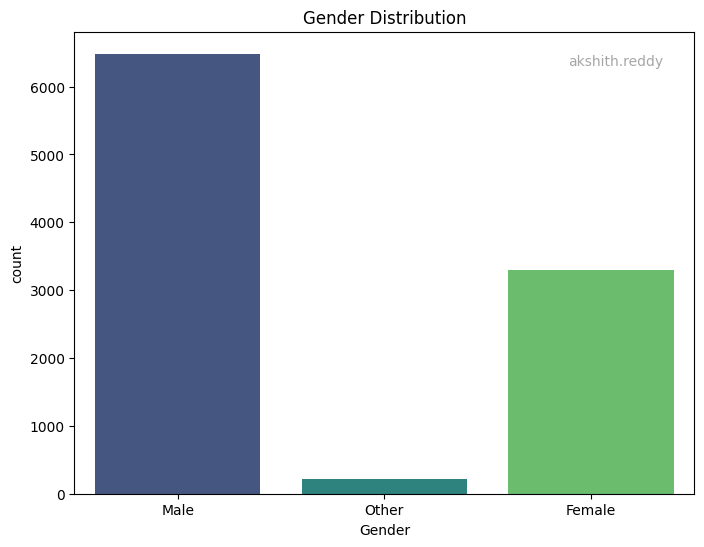

C:\Users\mavur_crvzl5q\AppData\Local\Temp\ipykernel_29244\151096262.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.data, x='Major', palette='viridis')


Plot saved to plots\major_distribution.png


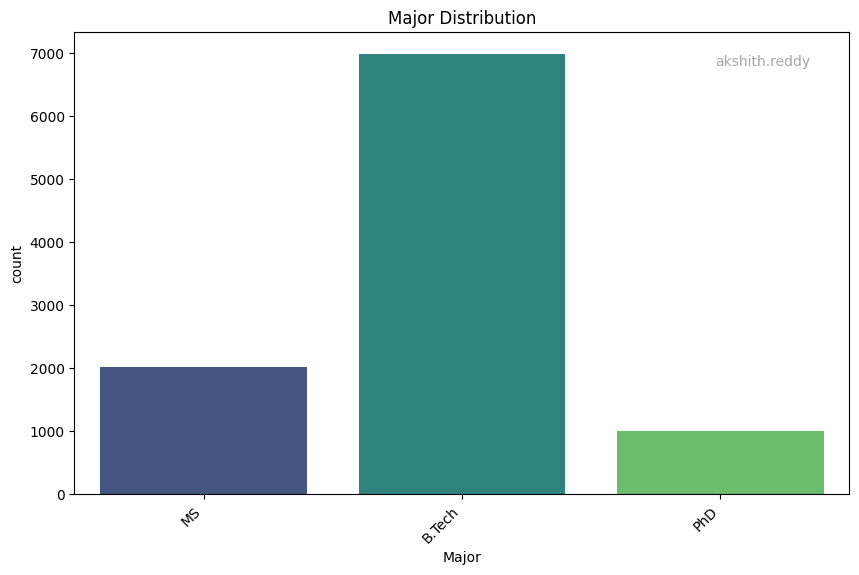

C:\Users\mavur_crvzl5q\AppData\Local\Temp\ipykernel_29244\151096262.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.data, x='Program', palette='viridis')


Plot saved to plots\program_distribution.png


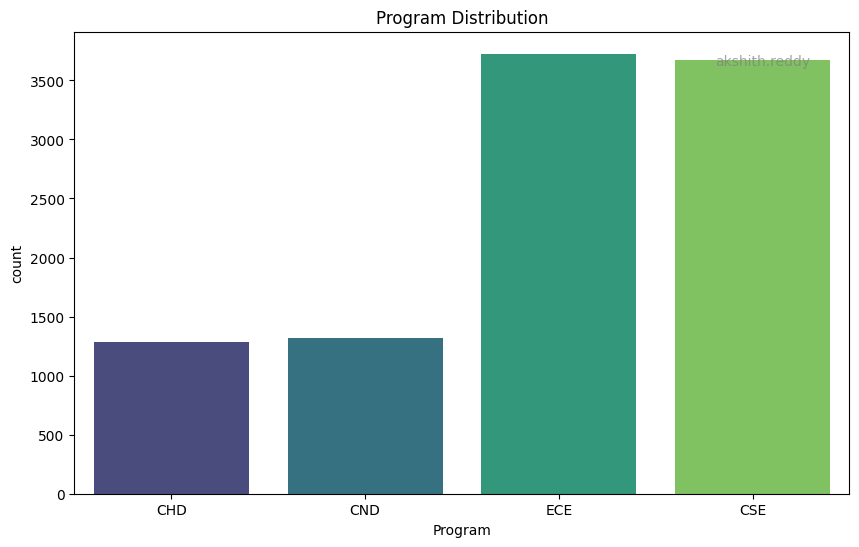

Plot saved to plots\gpa_distribution.png


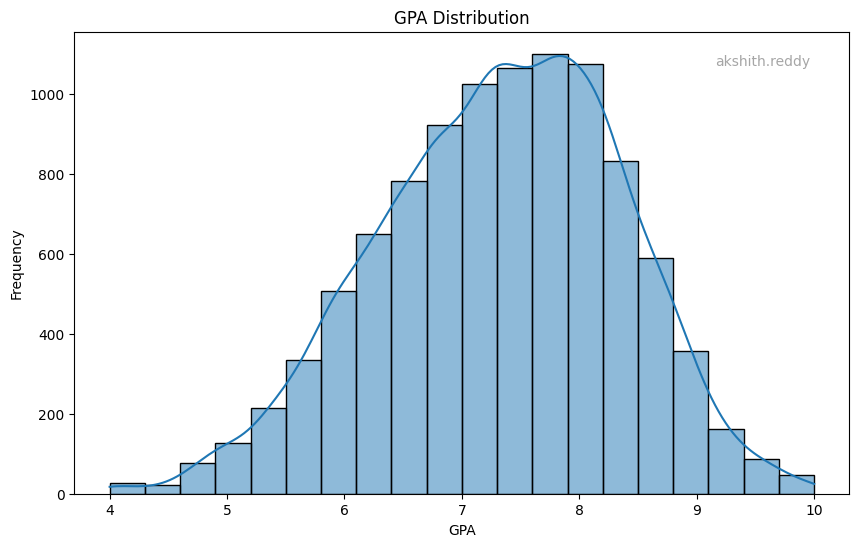

Plot saved to plots\program_by_major.png


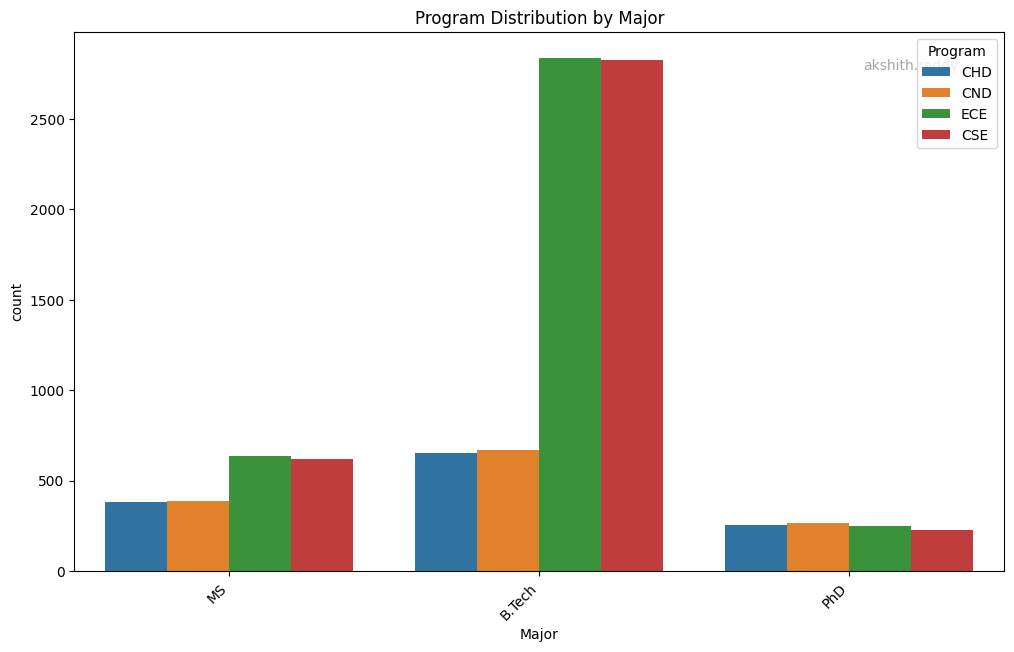

Plot saved to plots\gpa_by_major.png


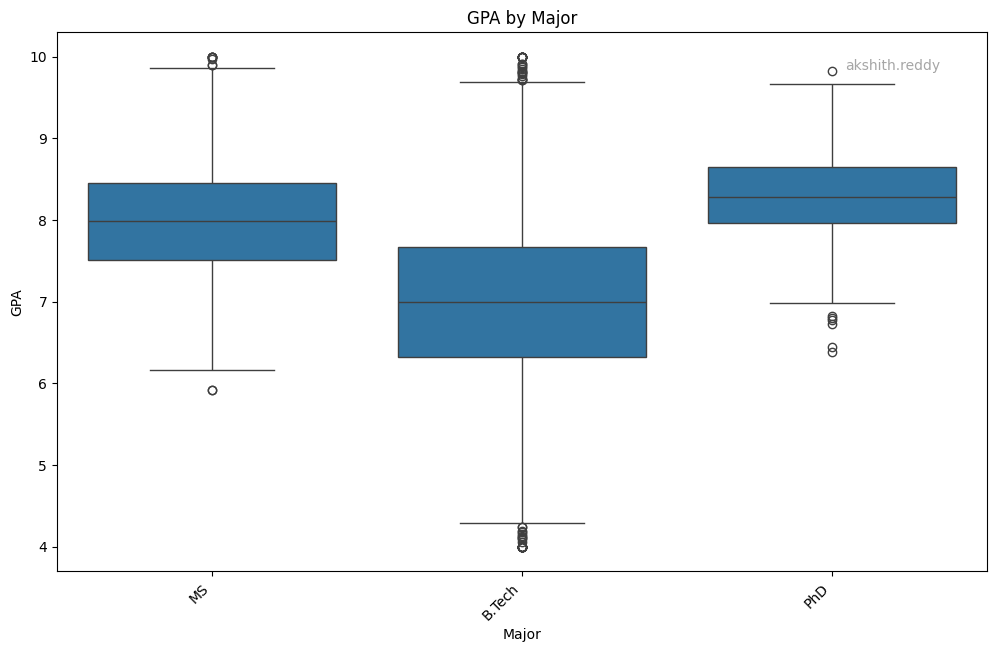

Plot saved to plots\gpa_by_program.png


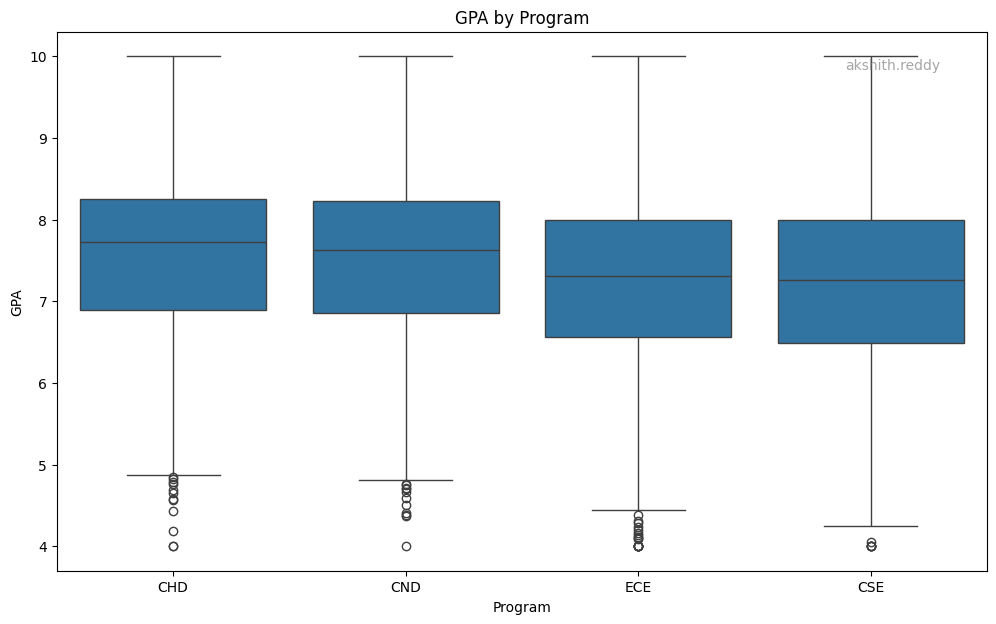

Plot saved to plots\gpa_by_program_and_major.png


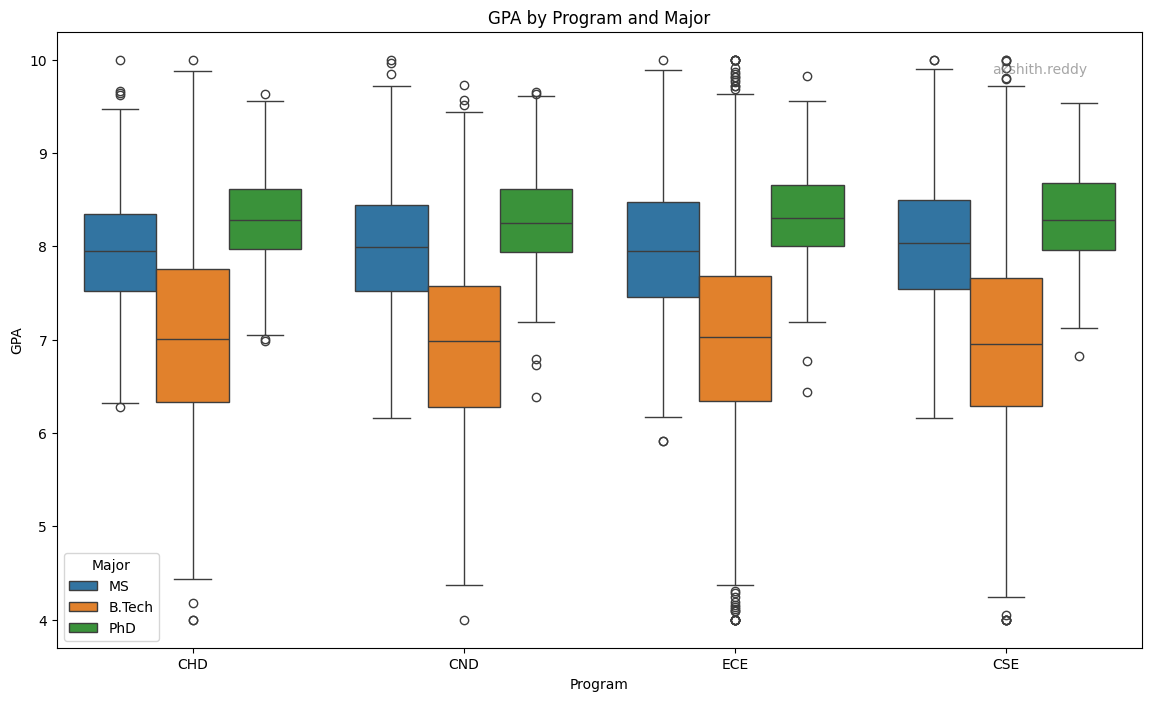

Plot saved to plots\sampled_dataset.png


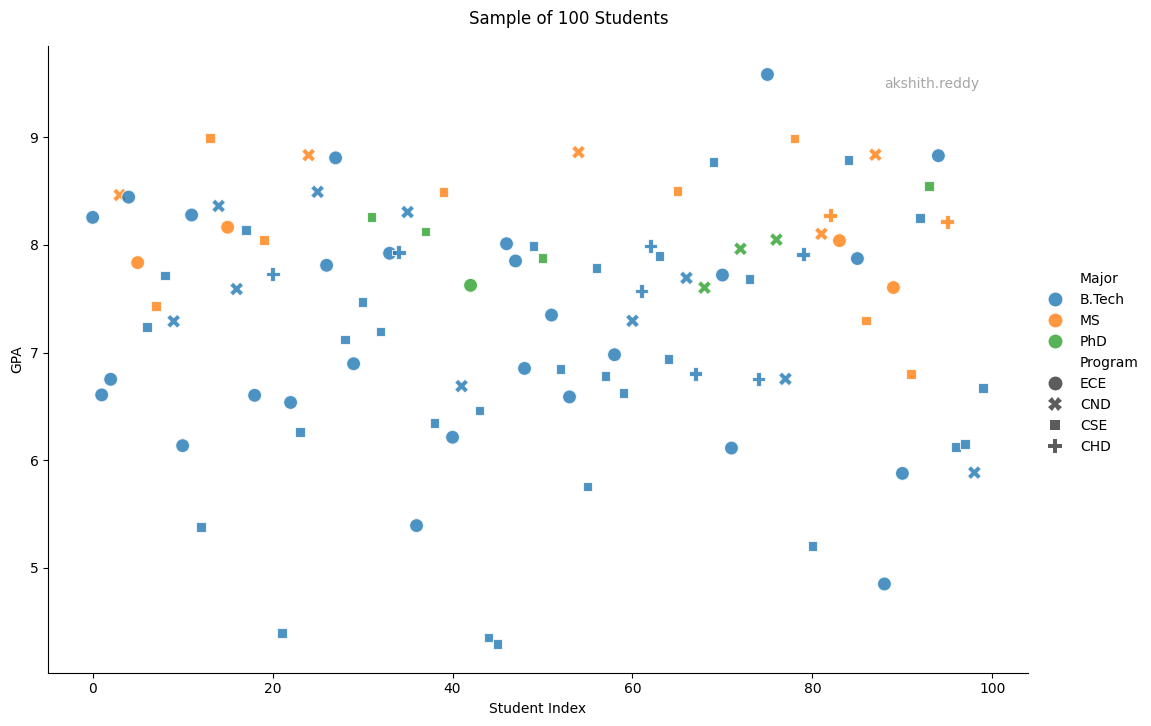

Plot saved to plots\entire_dataset_summary.png


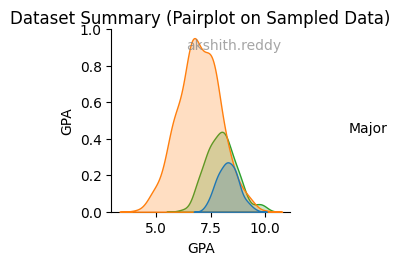

In [107]:

viz = StudentVisualizer(df)
viz.plot_all()


### (b) GPA Summary Statistics [1 mark]

Define a method to compute the mean and standard deviation of GPA:

```python
def gpa_mean_std(self) -> tuple[float, float]:
    ...


In [108]:
def gpa_mean_std(df):
    mean_gpa = df['GPA'].mean()
    std_gpa = df['GPA'].std()
    return mean_gpa, std_gpa

In [109]:
mean_gpa , std_mean = gpa_mean_std(df)
print(f"Mean GPA: {mean_gpa:.2f}, Standard Deviation: {std_mean:.2f}")  

Mean GPA: 7.32, Standard Deviation: 1.04


### (c) Program-Major Combinations [2 marks]

Define a method to count the number of students for each unique (program, major) pair.  
Also write a method to visualize it with a heatmap.

```python
def count_students_per_program_major_pair(self) -> pd.DataFrame:
    ...

def visualize_students_per_program_major_pair(self, counts_df: pd.DataFrame) -> None:
    ...


In [110]:
def count_students_per_program_major_pair(df):
    counts_df = df.groupby(["Program", "Major"]).size().reset_index(name="Count")
    return counts_df

def visualize_students_per_program_major_pair(counts_df):
    pivot_df = counts_df.pivot(index="Program", columns="Major", values="Count")
    plt.figure(figsize=(8, 6))
    add_username_watermark()

    sns.heatmap(pivot_df, annot=True, fmt="d", cmap="Blues")
    plt.title("Number of Students per Program-Major Pair")
    plt.ylabel("Program")
    plt.xlabel("Major")
    plt.show()

   Program   Major  Count
0      CHD  B.Tech    652
1      CHD      MS    380
2      CHD     PhD    252
3      CND  B.Tech    667
4      CND      MS    386
5      CND     PhD    267
6      CSE  B.Tech   2827
7      CSE      MS    618
8      CSE     PhD    225
9      ECE  B.Tech   2839
10     ECE      MS    636
11     ECE     PhD    251


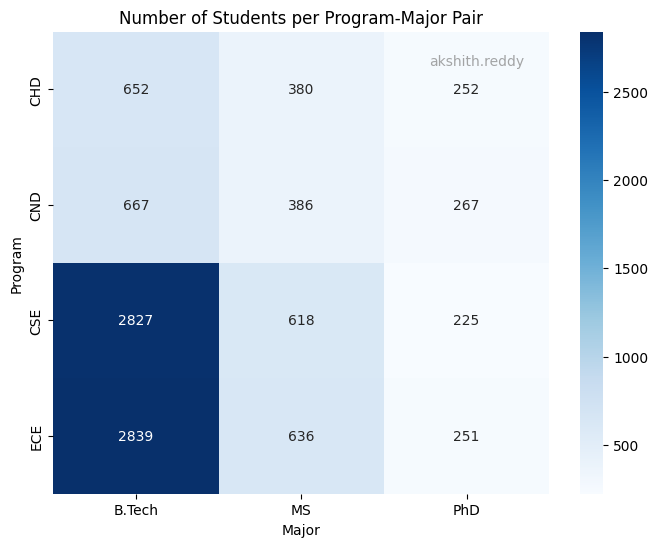

In [111]:
counts_df = count_students_per_program_major_pair(df)
print(counts_df)

    # Plot heatmap
visualize_students_per_program_major_pair(counts_df)

### Q1.2 Simple vs Stratified Sampling [5 marks]

- **Task 1 [2 marks]:** Sample 500 students uniformly at random. Repeat 50 times. Estimate mean GPA and standard deviation.  
- **Task 2 [2 marks]:** Repeat using stratified sampling by major. Compare results.  
- **Task 3 [1 mark]:** Which method has lower standard deviation? Why?  


In [112]:
def get_gpa_mean_std_random(df, n: int = 500, repeats: int = 50) :
    mean_estimates = []
    for _ in range(repeats):
        sample = df.sample(n)
        mean_estimates.append(sample['GPA'].mean())
    return np.mean(mean_estimates), np.std(mean_estimates)

#doubt
def get_gpa_mean_std_stratified(df, n: int = 500, repeats: int = 50) :
    mean_estimates = []
    majors = df['Major'].unique()
    major_props = df['Major'].value_counts(normalize=True)

    for _ in range(repeats):
        stratified_samples = []
        for major in majors:
            major_df = df[df['Major'] == major]
            n_major = int(round(major_props[major] * n))
            stratified_samples.append(major_df.sample(n=n_major, replace=False))
        sample = pd.concat(stratified_samples)
        mean_estimates.append(sample['GPA'].mean())
    return np.mean(mean_estimates), np.std(mean_estimates)


In [113]:
mean1,std1 = get_gpa_mean_std_random(df)
mean2,std2 = get_gpa_mean_std_stratified(df)

print (mean1, std1)
print(mean2, std2)

7.323550795108543 0.05474008342138845
7.315956078189551 0.04100683735336276


Both methods give a mean GPA close to the overall population mean.

Stratified sampling typically has lower standard deviation, because it ensures proportional representation of each major, reducing variance due to imbalance.

### Q1.3 Gender-Balanced Cohort [5 marks]

- **Task 1 (1 mark):**  
  Sample 300 students with exact same representation across genders. Repeat 5 times.  
  *Report gender counts.*

- **Task 2 (2 marks):**  
  Sampling Strategy A:  
  1. Randomly pick a value from a discrete set of categories with equal probability (here, gender).  
  2. Randomly pick a student from that category.  
  3. Sample 300 students using this sampling strategy.  
  4. Repeat 5 times.  
  *Report gender counts.*

- **Task 3 (2 marks):**  
  Repeat the above sampling process with number of students as **300, 600, 900, 1200, 1500**.  
  Plot a histogram for **average maximum relative difference in gender counts** v/s **number of students sampled** across 10 repeats.  

---

### Functions to Implement
```python
def get_gender_balanced_counts(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
    ...

def sample_gender_uniform_random(self, n: int = 300, repeats: int = 5) -> list[dict[str, int]]:
    ...

def plot_avg_max_gender_diff_vs_sample_size(self, sample_sizes: list[int], repeats: int = 10) -> None:
    ...


In [114]:


import random

#doubt
def get_gender_balanced_counts(df: pd.DataFrame, n: int = 300, repeats: int = 5) :
    genders = df['Gender'].unique()
    k = len(genders)
    n_per_gender = n // k
    results = []

    for _ in range(repeats):
        sampled = []
        counts = {}
        for gender in genders:
            group = df[df['Gender'] == gender]
            sub_sample = group.sample(n=n_per_gender, replace=False)
            sampled.append(sub_sample)
            counts[gender] = n_per_gender
        results.append(counts)
    return results

#doubt
def sample_gender_uniform_random(df: pd.DataFrame, n: int = 300, repeats: int = 5) :
    genders = df['Gender'].unique()
    results = []

    for _ in range(repeats):
        sampled_indices = []
        counts = {g: 0 for g in genders}
        for _ in range(n):
            chosen_gender = random.choice(genders)  # uniform gender selection
            group = df[df['Gender'] == chosen_gender]
            chosen_student = group.sample(n=1).index[0]
            sampled_indices.append(chosen_student)
            counts[chosen_gender] += 1
        results.append(counts)

    return results


def plot_avg_max_gender_diff_vs_sample_size(df: pd.DataFrame, sample_sizes: list[int], repeats: int = 10):

    genders = df['Gender'].unique()
    avg_max_diffs = []

    for n in sample_sizes:
        diffs = []
        for _ in range(repeats):
            counts = sample_gender_uniform_random(df, n=n, repeats=1)[0]
            total = sum(counts.values())
            proportions = {g: counts[g] / total for g in genders}
            max_diff = max(abs(proportions[g1] - proportions[g2]) for g1 in genders for g2 in genders)
            diffs.append(max_diff)
        avg_max_diffs.append(np.mean(diffs))

    # Plot
    plt.figure(figsize=(8, 6))
    add_username_watermark()
    plt.bar([str(s) for s in sample_sizes], avg_max_diffs, color="skyblue", edgecolor="black")
    plt.xlabel("Sample Size")
    plt.ylabel("Average Max Relative Difference in Gender Counts")
    plt.title("Gender Sampling Bias vs Sample Size")
    plt.show()


[{'Male': 100, 'Other': 100, 'Female': 100}, {'Male': 100, 'Other': 100, 'Female': 100}, {'Male': 100, 'Other': 100, 'Female': 100}, {'Male': 100, 'Other': 100, 'Female': 100}, {'Male': 100, 'Other': 100, 'Female': 100}] The result is not verified
[{'Male': 93, 'Other': 101, 'Female': 106}, {'Male': 102, 'Other': 96, 'Female': 102}, {'Male': 92, 'Other': 112, 'Female': 96}, {'Male': 100, 'Other': 108, 'Female': 92}, {'Male': 107, 'Other': 93, 'Female': 100}] The result is not verified


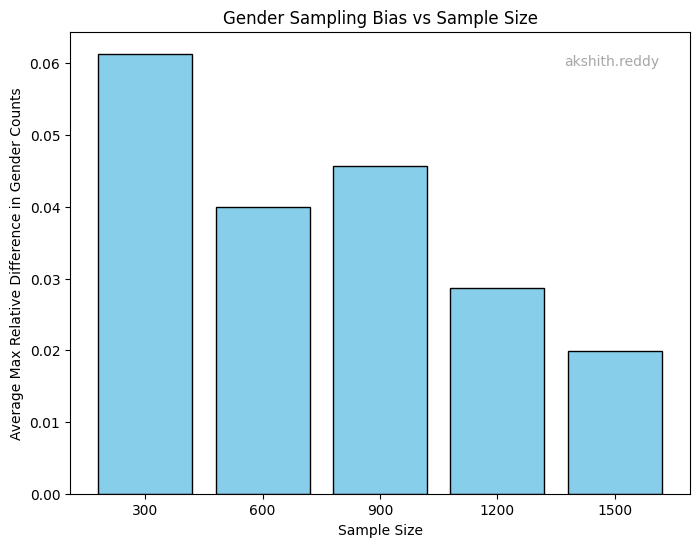

In [115]:
result1 = get_gender_balanced_counts(df, n=300, repeats=5)
print(result1, "The result is not verified")

result2 = sample_gender_uniform_random(df, n=300, repeats=5)
print(result2, "The result is not verified")

plot_avg_max_gender_diff_vs_sample_size(df, sample_sizes=[300,600,900,1200,1500], repeats=10)


### Q1.4 GPA-Uniform Cohort [3 marks]

- **Task 1 (1 mark):**  
  Using Sampling Strategy A, select 100 students such that their GPA values are approximately uniformly distributed across 10 bins.  

- **Task 2 (1 mark):**  
  Plot GPA histogram and compare it to the original dataset’s histogram.  

- **Task 3 (1 mark):**  
  Did you sample with or without replacement? Why?  

---

#### Functions to Implement
```python
def sample_gpa_uniform(self, n: int = 100, bins: int = 10) -> pd.DataFrame:
    ...

def plot_gpa_histogram_comparison(self, sampled_df: pd.DataFrame) -> None:
    ...


In [116]:
def sample_gpa_uniform(df: pd.DataFrame, n: int = 100, bins: int = 10):
    gpa_col = "GPA"
    bin_edges = np.linspace(df[gpa_col].min(), df[gpa_col].max(), bins + 1)
    df["GPA_bin"] = pd.cut(df[gpa_col], bins=bin_edges, include_lowest=True)

    n_per_bin = n // bins
    sampled_list = []

    for bin_val, group in df.groupby("GPA_bin"):
        if len(group) >= n_per_bin:
            sampled_list.append(group.sample(n=n_per_bin, replace=False))
        else:
            sampled_list.append(group.sample(n=n_per_bin, replace=True)) #only use replacement if < n_per_bin

    sampled_df = pd.concat(sampled_list).reset_index(drop=True)
    return sampled_df.drop(columns=["GPA_bin"]), bin_edges   


def plot_gpa_histogram_comparison(df: pd.DataFrame, sampled_df: pd.DataFrame, bin_edges):
    plt.figure(figsize=(10, 5))

    # Original
    plt.subplot(1, 2, 1)
    add_username_watermark()
    plt.hist(df["GPA"], bins=bin_edges, color="skyblue", edgecolor="black")
    plt.title("Original GPA Distribution")
    plt.xlabel("GPA")
    plt.ylabel("Count")

    # Sampled (uniform bins)
    plt.subplot(1, 2, 2)
    add_username_watermark()
    plt.hist(sampled_df["GPA"], bins=bin_edges, color="salmon", edgecolor="black")
    plt.title("Sampled GPA Distribution (Uniform)")
    plt.xlabel("GPA")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()


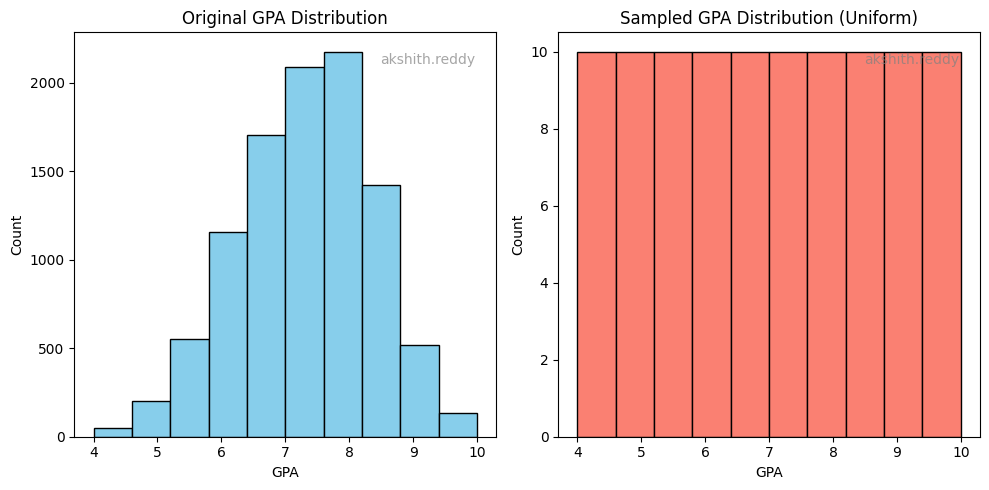

In [117]:
sampled_df, bin_edges = sample_gpa_uniform(df, n=100, bins=10)
plot_gpa_histogram_comparison(df, sampled_df, bin_edges)

Sampling is mostly done without replacement to avoid duplicates.
If some GPA bins are too sparse, then with replacement is necessary to maintain approximate uniformity.





### Q1.5 Program-Major Balanced Cohort [3 marks]

- **Task 1 (1 mark):**  
  Using Sampling Strategy A, select 60 students such that all valid (program, major) combinations are represented approximately equally.  

- **Task 2 (1 mark):**  
  Show counts and heatmap.  

- **Task 3 (1 mark):**  
  Were any groups too small? How did you handle it?  

---

#### Functions to Implement
```python
def sample_program_major_balanced(self, n: int) -> pd.DataFrame:
    ...

def show_program_major_counts_and_heatmap(self, sampled_df: pd.DataFrame) -> None:
    ...


In [118]:

def sample_program_major_balanced(df: pd.DataFrame, n: int = 60) -> pd.DataFrame:
    groups = df.groupby(["Program", "Major"])
    n_groups = len(groups)

    n_per_group = n // n_groups
    sampled_list = []

    for (prog, maj), group in groups:
        if len(group) >= n_per_group:
            sampled = group.sample(n=n_per_group, replace=False)
        else:
            sampled = group.sample(n=n_per_group, replace=True)  # handle small groups
        sampled_list.append(sampled)

    sampled_df = pd.concat(sampled_list).reset_index(drop=True)
    return sampled_df


def show_program_major_counts_and_heatmap(sampled_df: pd.DataFrame) -> None:
    counts = sampled_df.groupby(["Program", "Major"]).size().unstack(fill_value=0)
    print("Counts per (Program, Major):\n", counts)

    plt.figure(figsize=(8, 5))
    add_username_watermark()
    sns.heatmap(counts, annot=True, fmt="d", cmap="Blues")
    plt.title("Program-Major Distribution in Sampled Cohort")
    plt.show()


Counts per (Program, Major):
 Major    B.Tech  MS  PhD
Program                 
CHD           5   5    5
CND           5   5    5
CSE           5   5    5
ECE           5   5    5


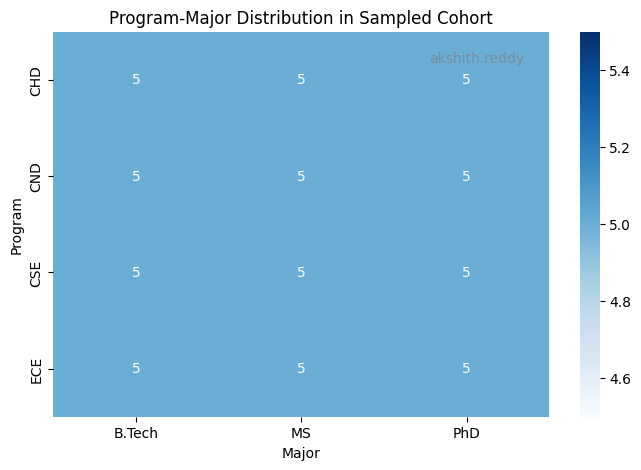

In [119]:
sampled_df2 = sample_program_major_balanced(df, n=60)
show_program_major_counts_and_heatmap(sampled_df2)  
